In [2]:
import requests
import json
import pandas as pd

In [2]:
# get runs from a list of latitudes (about 10 per instance)

latitudes = [40, 40.5, 41, 41.5, 42, 42.5, 43, 43.5, 
             44, 44.5, 45, 45.5, 46, 46.5, 47, 47.5, 48, 48.5, 49]
r_wa = []
for i in latitudes:
    r = requests.get('https://www.trailrunproject.com/data/get-trails?lat={lat}&lon=-121.28&maxDistance=100&key=109554088-4fc824fe38bb8105d6a1b44c2d38d3e9'
                       .format(lat = i))
    r_json = r.json()
    r_trails = r_json['trails']

    r_wa.append(r_trails)
print(print_wa)

In [6]:
# concatinate lists and make them into data frame

df = pd.DataFrame()
for j in range(len(r_wa)):
    x = pd.DataFrame(r_wa[j])
    df = pd.concat([df,x], axis=0)



In [8]:
df.describe()
df.to_csv('training_data.csv',index = False, header=True)

In [3]:
df = pd.read_csv('training_data.csv')

In [4]:
# clean and keep only the data we want


data =[]
data = df[['id','stars','starVotes','length','ascent','descent', 'high', 'low', 
          'longitude','latitude', 'difficulty']]
data["difficulty"].unique()

array(['black', 'blue', 'blueBlack', 'green', 'greenBlue', 'dblack'],
      dtype=object)

In [5]:
data.columns.values

array(['id', 'stars', 'starVotes', 'length', 'ascent', 'descent', 'high',
       'low', 'longitude', 'latitude', 'difficulty'], dtype=object)

In [6]:
# replace categorical variable 'difficulty' with int
mapping = {'green': 1, 'greenBlue': 2, 'blue': 3, 'blueBlack': 4, 'black': 5, 'dblack': 6}
data.replace(to_replace = {'difficulty' : mapping}, inplace = True)


/Users/iryna/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [7]:
data.describe()

,id,stars,starVotes,length,ascent,descent,high,low,longitude,latitude,difficulty
count,1.900000e+02,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,7.020012e+06,4.693158,28.394737,12.096842,2219.994737,-2335.194737,4912.047368,3237.705263,-121.609827,44.515965,3.694737
std,1.772593e+04,0.269833,29.246570,13.625198,2894.232302,2970.775152,2604.211295,2266.384919,0.734141,2.807821,1.074709
min,7.001016e+06,4.000000,1.000000,2.100000,91.000000,-25007.000000,110.000000,10.000000,-122.718300,38.921400,1.000000
25%,7.005406e+06,4.500000,5.000000,4.875000,918.250000,-2721.000000,2609.000000,921.000000,-122.070800,42.506500,3.000000
50%,7.016576e+06,4.700000,21.000000,7.200000,1502.000000,-1510.000000,5254.500000,3339.000000,-121.765800,44.373400,4.000000
75%,7.029084e+06,5.000000,39.000000,11.725000,2345.000000,-988.750000,6817.000000,4984.000000,-121.075075,47.434700,5.000000
max,7.090618e+06,5.000000,131.000000,83.500000,24989.000000,-91.000000,10725.000000,8921.000000,-119.894700,48.802200,6.000000


In [11]:
data['difficulty'].unique()

array([5, 3, 4, 1, 2, 6])

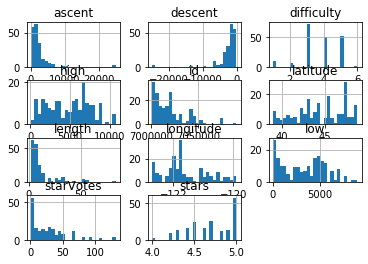

In [8]:
from matplotlib import pyplot as plt
data.hist(bins = 25)
#plt.savefig('training_data')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data_final = data[['length','ascent','descent', 'high', 'low', 
          'longitude','latitude', 'difficulty']]
X = data_final.loc[:, data_final.columns != 'difficulty']
y = data_final.loc[:, data_final.columns == 'difficulty']

# now, we need to split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [10]:
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm

columns = X_train.columns
os = SMOTE(random_state=0)
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['difficulty'])


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 5, n_neighbors = 6

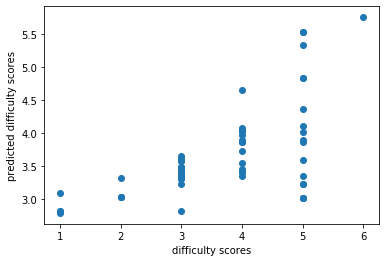

In [27]:
regressor = LinearRegression() 
LR = regressor.fit(X_train, y_train)
score = LR.score(X_test, y_test)
y_pred = LR.predict(X_test)
plt.figure()
plt.scatter(y_test,y_pred)
plt.xlabel('difficulty scores')
plt.ylabel('predicted difficulty scores')
plt.savefig('prediction_scores')
plt.show()


In [19]:
y_pred = LR.predict(X_test)
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(LR.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LR.score(X_test, y_test)))

Accuracy of logistic regression classifier on training set: 0.40
Accuracy of logistic regression classifier on test set: 0.37


In [29]:

ols_model = sm.OLS(y_train,X_train)
result = ols_model.fit()
print(result.summary2())
result.print

                       Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.956   
Dependent Variable:     difficulty       AIC:                         324.2708
Date:                   2020-06-12 12:42 BIC:                         344.5032
No. Observations:       133              Log-Likelihood:              -155.14 
Df Model:               7                F-statistic:                 418.6   
Df Residuals:           126              Prob (F-statistic):          5.21e-84
R-squared (uncentered): 0.959            Scale:                       0.63702 
----------------------------------------------------------------------------------
                Coef.      Std.Err.        t        P>|t|       [0.025      0.975]
----------------------------------------------------------------------------------
length         -0.0279       0.0094     -2.9610     0.0037     -0.0465     -0.0093
ascent          0.0002       0.0001      1.5025     0.1355  

AttributeError: 'OLSResults' object has no attribute 'print'